# Statistical Methods in Pandas - Lab

## Introduction

In this lesson you'll get some hands on experience using some of the key summary statistics methods in Pandas.

## Objectives:
You will be able to:

* Understand and use the df.describe() and df.info() summary statistics methods
* Use built-in Pandas methods for calculating summary statistics (.mean(), .std(), .count(), .sum(), .mean(), .median(), .std(), .var() and .quantile())
* Apply a function to every element in a Series or DataFrame using s.apply() and df.applymap()


## Getting Started

For this lab, we'll be working with a dataset containing information on various lego datasets.  You will find this dataset in the file `lego_sets.csv`.  

In the cell below:

* Import pandas and set the standard alias of `pd`
* Load in the `lego_sets.csv`dataset using the `read_csv()` function
* Display the head of the DataFrame to get a feel for what we'll be working with

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('lego_sets.csv')
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


## Getting DataFrame-Level Statistics

We'll begin by getting some overall summary statistics on the dataset.  There are two ways we'll get this information-- `.info()` and `.describe()`.

### Using `.info()`

The `.info()` method provides us metadata on the DataFrame itself.  This allows to answer questions such as:

* What data type does each column contain?
* How many rows are in my dataset? 
* How many total non-missing values does each column contain?
* How much memory does the DataFrame take up?

In the cell below, call our DataFrame's `.info()` method. 

In [4]:
import numpy as np

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
ages                 12261 non-null object
list_price           12261 non-null float64
num_reviews          10641 non-null float64
piece_count          12261 non-null float64
play_star_rating     10486 non-null float64
prod_desc            11884 non-null object
prod_id              12261 non-null float64
prod_long_desc       12261 non-null object
review_difficulty    10206 non-null object
set_name             12261 non-null object
star_rating          10641 non-null float64
theme_name           12258 non-null object
val_star_rating      10466 non-null float64
country              12261 non-null object
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


In [7]:
#Your code here
def normalize_col(series):
    mu = series.mean()
    std = series.std()
    series = series.map(lambda x: (x-mu)/std)
    return series
for col in df.columns:
    if df[col].dtype in [np.float64]:
        df[col] = normalize_col(df[col])
        print('Transformed {} to standard normal variable.')
        print('Now mu: {} std: {}'.format(df[col].mean(), df[col].std()))
    else:
        continue

Transformed {} to standard normal variable.
Now mu: 2.112873669081103e-16 std: 0.999999999999999
Transformed {} to standard normal variable.
Now mu: -2.4377225691997434e-16 std: 1.0000000000000222
Transformed {} to standard normal variable.
Now mu: -3.306401903938308e-17 std: 1.0000000000000073
Transformed {} to standard normal variable.
Now mu: 3.89770812527246e-14 std: 1.0000000000000264
Transformed {} to standard normal variable.
Now mu: -2.5472605384133787e-17 std: 0.9999999999999981
Transformed {} to standard normal variable.
Now mu: 2.153038682506626e-14 std: 0.9999999999999868
Transformed {} to standard normal variable.
Now mu: -4.4576886505471716e-14 std: 0.9999999999999545


In [5]:
#With Lambda
for col in df.columns:
    if df[col].dtype in [np.float64]:
        mu = df[col].mean()
        std = df[col].std()
        df[col] = df[col].map(lambda x: (x-mu)/std)
        print('Transformed {} to standard normal variable.')
        print('Original mu: {} std: {}, Now mu: {} std: {}'.format(mu, std, df[col].mean(), df[col].std()))
    else:
        continue

Transformed {} to standard normal variable.
Original mu: 65.14199840958968 std: 91.9804293059252, Now mu: 1.8110154288224448e-14 std: 0.9999999999999973
Transformed {} to standard normal variable.
Original mu: 16.82623813551358 std: 36.36898377283125, Now mu: -2.4377225691997434e-16 std: 1.0000000000000222
Transformed {} to standard normal variable.
Original mu: 493.40592121360413 std: 825.364580411521, Now mu: -3.306401903938308e-17 std: 1.0000000000000073
Transformed {} to standard normal variable.
Original mu: 4.337640663742107 std: 0.6520510342493655, Now mu: 3.89770812527246e-14 std: 1.0000000000000264
Transformed {} to standard normal variable.
Original mu: 59836.7523040535 std: 163811.4523357176, Now mu: -2.5472605384133787e-17 std: 0.9999999999999981
Transformed {} to standard normal variable.
Original mu: 4.514134009961459 std: 0.5188653617448391, Now mu: 2.153038682506626e-14 std: 0.9999999999999868
Transformed {} to standard normal variable.
Original mu: 4.22896044334037 std

#### Interpreting the Results

Read the output above, and then answer the following questions:

How many total rows are in this DataFrame?  How many columns contain numeric data? How many contain categorical data?  Identify at least 3 columns that contain missing values. 

Create a dictionary that rebins the age column to the following age ranges:
Under 5, 5-8, 8-12, 12-18, 18-25, 25-35, 35-55, 55-64, 65+ 

There are 12261 rows, as evidenced by the Range Index listed in the output.  Of the 14 columns in this dataset, 7 contain numeric data stored as `float64`, and the other 7 contain strings, which pandas lists as `object`.  The column `num_reviews`, `review_difficulty`, and `val_star_rating` all contain missing values.  We can tell this because the number of entries for each of those columns is less than the total number of entries described by the Range Index. 


## Using `.describe()`

Whereas `.info()` provides statistics about the DataFrame itself, `.describe()` returns output containing basic summary statistics about the data contained with the DataFrame.  

In the cell below, call the DataFrame's `.describe()` method. 

In [18]:
len(bins)

9

In [19]:
#Preview Current Values
df.ages.value_counts()[:5]
        

6-12    1476
7-14    1421
8-14    1180
4-7      957
5-12     911
Name: ages, dtype: int64

In [40]:
bins = ['0-5', '5-8', '8-12', '12-18', '18-25', '25-35', '35-55', '55-64', '65+']
up_lims = [int(bin.split('-')[-1].strip('+')) for bin in bins]
bin_map = {}
for age in df.ages.unique():
    cur_up_lim = int(age.split('-')[-1].strip('+'))
#     cur_lwr_lim = age.split('-')[0]
    #Iterate through the list to find bin that age falls in
    for n, new_up_lim in enumerate(up_lims):
        if cur_up_lim <= new_up_lim:
#             print(cur_up_lim, new_up_lim)
            bin_map[age] = bins[n]
            break

# Notes
This transformation is messy and arguements could certainly be made for a few corrections below including the mapping of 5+ to the 0-5 bin range. Further conditional rules could be introduced to handle this case.

In [41]:
#Preview Dict
bin_map

{'10+': '8-12',
 '10-14': '12-18',
 '10-16': '12-18',
 '10-21': '18-25',
 '11-16': '12-18',
 '12+': '8-12',
 '12-16': '12-18',
 '14+': '12-18',
 '16+': '12-18',
 '1½-3': '0-5',
 '1½-5': '0-5',
 '2-5': '0-5',
 '4+': '0-5',
 '4-7': '5-8',
 '5+': '0-5',
 '5-12': '8-12',
 '5-8': '5-8',
 '6+': '5-8',
 '6-12': '8-12',
 '6-14': '12-18',
 '7+': '5-8',
 '7-12': '8-12',
 '7-14': '12-18',
 '8+': '5-8',
 '8-12': '8-12',
 '8-14': '12-18',
 '9+': '8-12',
 '9-12': '8-12',
 '9-14': '12-18',
 '9-16': '12-18'}

In [42]:
df['ages2'] = df.ages.map(bin_map)
df['ages2'].value_counts()

8-12     4695
12-18    4459
5-8      1354
0-5      1258
18-25     184
Name: ages2, dtype: int64

#### Interpreting the Results

The output contains descriptive statistics corresponding to the columns.  Use these to answer the following questions:

How much is the standard deviation for piece count?  How many pieces are in the largest lego set?  How many in the smallest lego set? What is the median `val_star_rating`?

________________________________________________________________________________________________________________________________

The standard deviation is 825 pieces.  The largest lego set contains 7,541 pieces, while the smallest contains only 1.  The median value for `val_star_rating` is 4.3.


## Getting Summary Statistics

Pandas also allows us to easily compute individual summary statistics using built-in methods.  Next, we'll get some practice using these methods. 

In the cell below, compute the median value of the `star_rating` column.

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

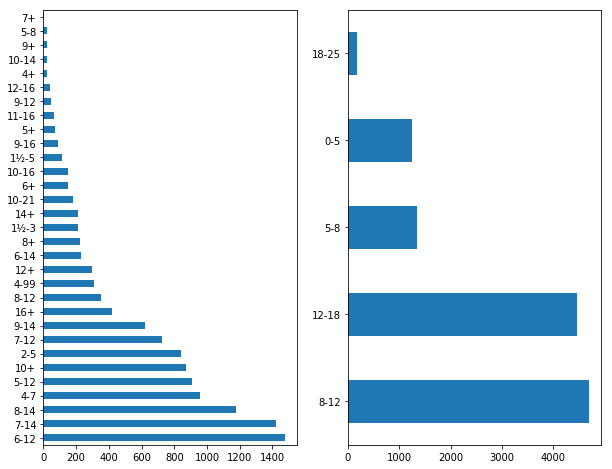

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
df.ages.value_counts().plot(ax=ax1, kind='barh')
df.ages2.value_counts().plot(ax=ax2, kind='barh')


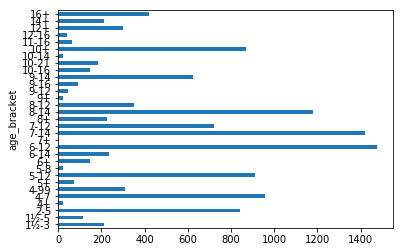

In [67]:
#With ordering
temp = df.ages.value_counts()
temp = temp.reset_index()
temp.columns = ['age_bracket', 'count']
temp['order'] = temp['age_bracket'].map(lambda x: int(x.split('-')[0].strip('+').strip('½')))
temp = temp.sort_values(by='order')
temp = temp.set_index('age_bracket')
temp['count'].plot(kind='barh')

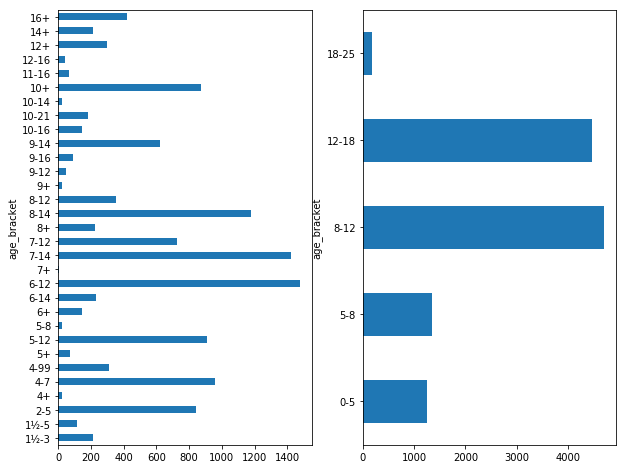

In [68]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

temp = df.ages.value_counts()
temp = temp.reset_index()
temp.columns = ['age_bracket', 'count']
temp['order'] = temp['age_bracket'].map(lambda x: int(x.split('-')[0].strip('+').strip('½')))
temp = temp.sort_values(by='order')
temp = temp.set_index('age_bracket')
temp['count'].plot(ax=ax1, kind='barh')

temp = df.ages2.value_counts()
temp = temp.reset_index()
temp.columns = ['age_bracket', 'count']
temp['order'] = temp['age_bracket'].map(lambda x: int(x.split('-')[0].strip('+').strip('½')))
temp = temp.sort_values(by='order')
temp = temp.set_index('age_bracket')
temp['count'].plot(ax=ax2, kind='barh')

# Level Up:
Write your dictionary for the data transformation with a loop rather then manually coding the mapping.

In [ ]:
# See code above.